## NEURAL NETWORK MODEL TO PREDICT IF A RESTAURANT WILL BE GOOD OR BAD

In this section, we will investigate which features are the most important in order to classify a restaurant into good or bad regarding Yelp's reviews. The aim of this analysis is to know which attributes for a restaurant are more valued in the city of Phoenix as a potential market.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
restaurants=pd.read_csv('cleaned_restaurants.csv')

In [3]:
restaurants.head()

,Unnamed: 0,index,RestaurantsTakeOut,BusinessAcceptsCreditCards,NoiseLevel,GoodForKids,RestaurantsReservations,RestaurantsGoodForGroups,RestaurantsPriceRange2,HasTV,...,city,hours,is_open,latitude,longitude,name,postal_code,review_count,stars,state
0,0,8,1,1,-1,0,0,0,1,1,...,Champaign,"{'Monday': '11:30-14:30', 'Tuesday': '11:30-14...",1,40.110446,-88.233073,The Empanadas House,61820,5,4.5,IL
1,1,20,1,1,0,1,0,1,1,0,...,Charlotte,0,0,35.194894,-80.767442,Middle East Deli,28205,5,3.0,NC
2,2,24,1,0,0,0,0,0,0,1,...,Aurora,"{'Monday': '11:0-22:0', 'Tuesday': '11:0-22:0'...",1,44.010962,-79.448677,Philthy Phillys,L4G 7J1,4,4.5,ON
3,3,25,1,0,0,1,0,0,0,0,...,Thornhill,0,1,43.820492,-79.398466,Banzai Sushi,L3T 5W4,7,4.5,ON
4,4,30,1,0,0,0,1,0,0,1,...,Richmond Hill,"{'Tuesday': '12:0-21:0', 'Wednesday': '12:0-21...",1,43.947011,-79.454862,Apadana Restaurant,L4E 1A5,3,3.0,ON


In [4]:
restaurants.columns

Index(['Unnamed: 0', 'index', 'RestaurantsTakeOut',
       'BusinessAcceptsCreditCards', 'NoiseLevel', 'GoodForKids',
       'RestaurantsReservations', 'RestaurantsGoodForGroups',
       'RestaurantsPriceRange2', 'HasTV', 'Alcohol', 'BikeParking',
       'RestaurantsDelivery', 'OutdoorSeating', 'RestaurantsTableService',
       'Caters', 'RestaurantsAttire_'casual'', 'RestaurantsAttire_'dressy'',
       'RestaurantsAttire_'formal'', 'WiFi_'free'', 'WiFi_'no'', 'WiFi_'paid'',
       'casual', 'classy', 'divey', 'hipster', 'intimate', 'romantic',
       'touristy', 'trendy', 'upscale', 'garage', 'lot', 'street', 'valet',
       'validated', 'breakfast', 'brunch', 'dessert', 'dinner', 'latenight',
       'lunch', 'address', 'attributes', 'business_id', 'categories', 'city',
       'hours', 'is_open', 'latitude', 'longitude', 'name', 'postal_code',
       'review_count', 'stars', 'state'],
      dtype='object')

In [5]:
features_to_use = ['RestaurantsTakeOut',
       'BusinessAcceptsCreditCards', 'NoiseLevel', 'GoodForKids',
       'RestaurantsReservations', 'RestaurantsGoodForGroups',
       'RestaurantsPriceRange2', 'HasTV', 'Alcohol', 'BikeParking',
       'RestaurantsDelivery', 'OutdoorSeating', 'RestaurantsTableService',
       'Caters', "RestaurantsAttire_'casual'", "RestaurantsAttire_'dressy'",
       "RestaurantsAttire_'formal'", "WiFi_'free'", "WiFi_'no'", "WiFi_'paid'",
       'casual', 'classy', 'divey', 'hipster', 'intimate', 'romantic',
       'touristy', 'trendy', 'upscale', 'garage', 'lot', 'street', 'valet',
       'validated', 'breakfast', 'brunch', 'dessert', 'dinner', 'latenight',
       'lunch'] 

target_variables = 'stars'

In [6]:
print(len(features_to_use))

40


### Data splitting

In [7]:
split1=int(len(restaurants)*3/5)
split2=int(len(restaurants)*4/5)

train=restaurants[:split1]

val=restaurants[split1:split2]
test=restaurants[split2:]

In [8]:
X_train=train[features_to_use]
y_train=train[target_variables]

X_val=val[features_to_use]
y_val=val[target_variables]


X_test=test[features_to_use]
y_test=test[target_variables]




In [9]:
print("Num train examples:", len(y_train))
print("Num validation examples:", len(y_val))
print("Num test examples:", len(y_test))

Num train examples: 38366
Num validation examples: 12789
Num test examples: 12789


In [10]:
y_train.astype(int).mean()

3.1971016003753325

We separate our target variable, stars rating, in 0(bad) or 1(good) reviews using the threshold of 3.44 stars. If it is over it, it is considered good, otherwise it is considered as bad.

In [11]:
m=0.6*y_train.mean()+0.2*y_val.mean()+0.2*y_test.mean()

In [12]:
print(m)

3.438141203677294


In [13]:
new_y_test=[]

for y in y_test:
    new_y_test.append(int((y-m)/4+1))

In [14]:
new_y_val=[]

for y in y_val:
    new_y_val.append(int((y-m)/4+1))
    
    

In [15]:
new_y_train=[]

for y in y_train:
    new_y_train.append(int((y-m)/4+1))
    
    


In [16]:
y_test=new_y_test
y_val=new_y_val
y_train=new_y_train

We do the imports from keras and sklearn to train our model.

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score, precision_score

Using TensorFlow backend.


We define a function to evaluate and show the results of the model.

In [18]:
def evaluate(y_true, y_pred):
    # calculate and display confusion matrix
    
    labels= np.unique(y_true)
    
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    
    

    df_cm = pd.DataFrame(cm, index = [i for i in list(labels)],
                  columns = [i for i in list(labels)])
    plt.figure(figsize = (8,5))
    plt.rcParams['xtick.bottom'] = plt.rcParams['xtick.labelbottom'] = False
    plt.rcParams['xtick.top'] = plt.rcParams['xtick.labeltop'] = True
    sns.heatmap(df_cm, annot=True,fmt="d")
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    
    
    accuracy = float(np.trace(cm)) / np.sum(cm)
    precision = precision_score(y_true, y_pred, average=None, labels=labels)[1]
    recall = recall_score(y_true, y_pred, average=None, labels=labels)[1]
    f1 = 2 * precision * recall / (precision + recall)
    
    
    print('\033[1m'+'Test score'+ '\033[0m')
    print('\033[1m' +'Accuracy:' + '\033[0m',"%.2f" %(accuracy*100),'%')
    print('\033[1m' + "Precision:" + '\033[0m', "%.2f" %(precision*100),"%")
    print('\033[1m' + "Recall:" + '\033[0m', "%.2f" %(recall*100),"%")
    print('\033[1m' + "f1 score:" + '\033[0m', "%.2f" %(f1*100),"%")

## Training of the model

To obtain feature importances we got inspired by the solution provided by Justing Hallas using the library eli5. (https://stackoverflow.com/questions/45361559/feature-importance-chart-in-neural-network-using-keras-in-python)

In [19]:
from keras.wrappers.scikit_learn import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance

def baseline_model():
    model = Sequential()
    model.add(Dense(150, input_dim=40, activation='relu'))
    #We have 40 features in our dataset

    model.add(Dropout(rate=0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(40, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

my_model = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=128, validation_data=(X_val,y_val))    
my_model.fit(X_train,y_train)

perm = PermutationImportance(my_model, random_state=1).fit(X_train,y_train)
#eli5.show_weights(perm, feature_names = X_train.columns.tolist())





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 38366 samples, validate on 12789 samples
Epoch 1/10
38366/38366 [==============================] - 3s 66us/step - loss: 0.6361 - acc: 0.6307 - val_loss: 0.6098 - val_acc: 0.6623
Epoch 2/10
38366/38366 [==============================] - 2s 41us/step - loss: 0.6118 - acc: 0.6564 - val_loss: 0.6006 - val_acc: 0.6700
Epoch 3/10
38366/38366 [==============================] - 1s 38us/step - loss: 0.6057 - acc: 0.6659 - val_loss: 0.6101 - val_acc: 0.6723
Epoch 4/10
38366/38366 [==============================] - 2s 41us/step - loss: 0.6010 - acc: 0.6679 - val_loss: 0.5986 - val_acc: 0.6725
Epoch 5/10
38366/38366 [==============================] - 2s 46us/step - loss: 0.5999 - acc: 0.6722 - val_loss: 0.5984 - val_acc: 0.6733
Epoch 6/10
38366/38366 [==========================

38366/38366 [==============================] - 0s 7us/step


In [20]:
importances=eli5.explain_weights_df(perm, feature_names = X_train.columns.tolist())

Test score
Accuracy: 68.41 %
Precision: 69.64 %
Recall: 87.99 %
f1 score: 77.75 %


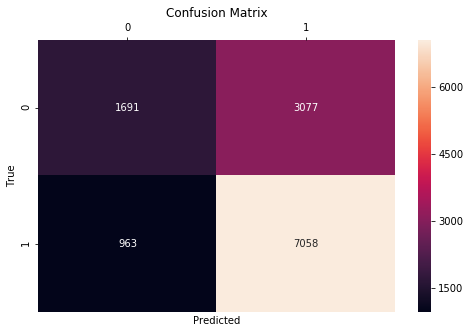

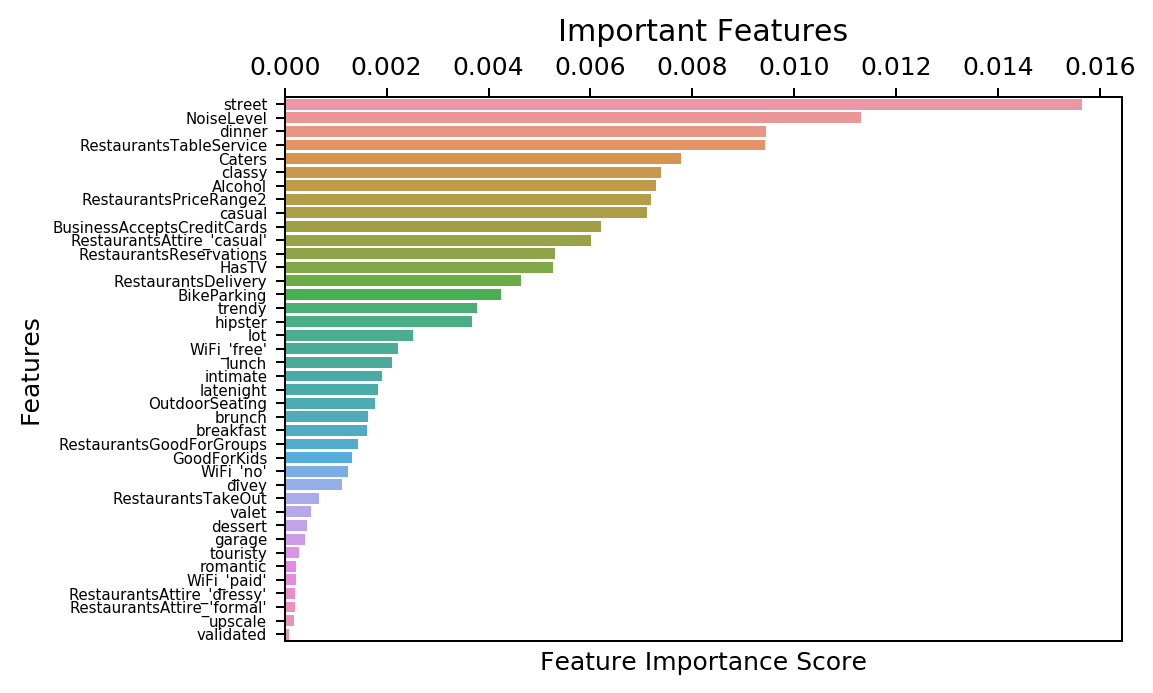

In [22]:
import seaborn as sns

y_pred = my_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

evaluate(y_test, y_pred)

plt.figure(figsize=(6, 4), dpi=180)
sns.barplot(x=importances['weight'], y=importances['feature'])
# Add labels to your graph
plt.xticks(fontsize=10)
plt.yticks(fontsize=6)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
#plt.legend()
plt.show() 




## FOR PHOENIX

Now we will apply the same model but just for the restaurants included in Phoenix Metropolis.

In [23]:
restaurants_phoenix=restaurants[restaurants['state']=='AZ']
restaurants_phoenix=restaurants_phoenix[restaurants_phoenix['latitude']<34]

In [24]:
split1=int(len(restaurants_phoenix)*3/5)
split2=int(len(restaurants_phoenix)*4/5)

train=restaurants_phoenix[:split1]

val=restaurants_phoenix[split1:split2]
test=restaurants_phoenix[split2:]

X_train=train[features_to_use]
y_train=train[target_variables]

X_val=val[features_to_use]
y_val=val[target_variables]


X_test=test[features_to_use]
y_test=test[target_variables]




print("Num train examples:", len(y_train))
print("Num validation examples:", len(y_val))
print("Num test examples:", len(y_test))

y_train.astype(int).mean()
m=0.6*y_train.mean()+0.2*y_val.mean()+0.2*y_test.mean()

new_y_test=[]

for y in y_test:
    new_y_test.append(int((y-m)/4+1))
    
new_y_val=[]

for y in y_val:
    new_y_val.append(int((y-m)/4+1))
    
    
new_y_train=[]

for y in y_train:
    new_y_train.append(int((y-m)/4+1))
    

y_test=new_y_test
y_val=new_y_val
y_train=new_y_train

Num train examples: 7274
Num validation examples: 2425
Num test examples: 2425


In [25]:
def baseline_model():
    model = Sequential()
    model.add(Dense(150, input_dim=40, activation='relu'))
    #We have 40 features in our dataset

    model.add(Dropout(rate=0.5))
    model.add(Dense(100, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(40, activation='relu'))
    model.add(Dropout(rate=0.5))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

my_model = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=128, validation_data=(X_val,y_val))    
my_model.fit(X_train,y_train)

perm = PermutationImportance(my_model, random_state=1).fit(X_train,y_train)

Train on 7274 samples, validate on 2425 samples
Epoch 1/10
7274/7274 [==============================] - 1s 130us/step - loss: 0.6602 - acc: 0.6030 - val_loss: 0.6396 - val_acc: 0.6190
Epoch 2/10
7274/7274 [==============================] - 0s 36us/step - loss: 0.6250 - acc: 0.6453 - val_loss: 0.6011 - val_acc: 0.6854
Epoch 3/10
7274/7274 [==============================] - 0s 39us/step - loss: 0.6042 - acc: 0.6651 - val_loss: 0.5912 - val_acc: 0.6924
Epoch 4/10
7274/7274 [==============================] - 0s 39us/step - loss: 0.5964 - acc: 0.6849 - val_loss: 0.5843 - val_acc: 0.6936
Epoch 5/10
7274/7274 [==============================] - 0s 39us/step - loss: 0.5889 - acc: 0.6923 - val_loss: 0.5796 - val_acc: 0.6948
Epoch 6/10
7274/7274 [==============================] - 0s 44us/step - loss: 0.5768 - acc: 0.6941 - val_loss: 0.5756 - val_acc: 0.6948
Epoch 7/10
7274/7274 [==============================] - 0s 46us/step - loss: 0.5721 - acc: 0.7053 - val_loss: 0.5741 - val_acc: 0.6907
Epoch 

7274/7274 [==============================] - 0s 9us/step


Test score
Accuracy: 71.13 %
Precision: 71.88 %
Recall: 86.47 %
f1 score: 78.50 %


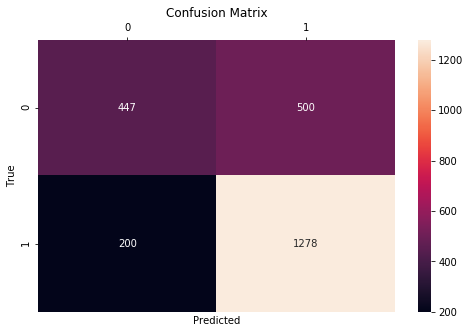

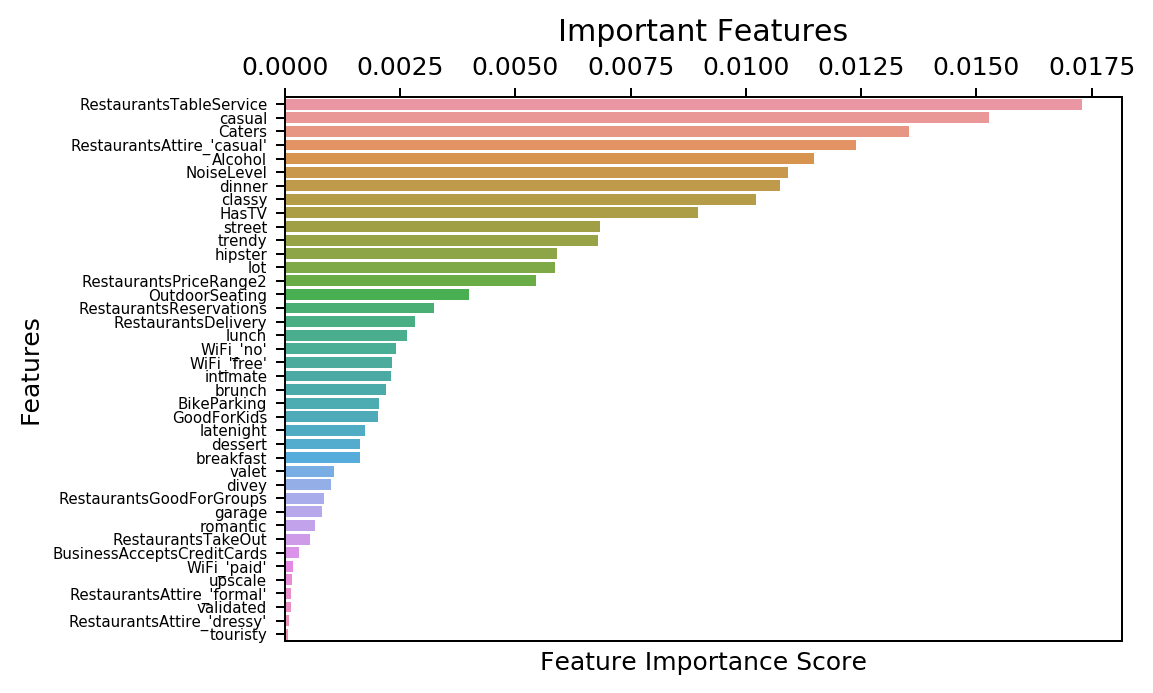

In [26]:
y_pred = my_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

evaluate(y_test, y_pred)



importances=eli5.explain_weights_df(perm, feature_names = X_train.columns.tolist())
plt.figure(figsize=(6, 4), dpi=180)
sns.barplot(x=importances['weight'], y=importances['feature'])
# Add labels to your graph
plt.xticks(fontsize=10)
plt.yticks(fontsize=6)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Important Features")
#plt.legend()
plt.show() 


Here we can see that the main difference in Phoenix is that the most valued feature is that the Restaurant has table service. This could be a good characteristic to take into account for Banh Mi Boys if it is opening in Phoenix.